<a href="https://colab.research.google.com/github/Dileepsingh6432/mini-project/blob/main/EDA_on_Demo_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Demo Data:**

### Import Libraries

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Mount Google Drive

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [232]:
file_path = '/content/drive/MyDrive/Colab Notebooks/MIS.xlsx'

# Load the Excel workbook into a pandas ExcelFile object
workbook= pd.ExcelFile(file_path)

# Print the sheet names in the workbook
print(workbook.sheet_names)


['Spectrometer L', 'Spectrometer R', 'Instrument - Corneometer']


In [233]:
spectrometer_Left_cheek = 'Spectrometer L'  #spectrometer reading for left cheek
left_cheek = pd.read_excel(workbook, spectrometer_Left_cheek, header=1)
left_cheek.index = range(1, len(left_cheek)+1)

left_cheek.head()

,Visit 1 - Baseline,Visit 1 - Timm,Visit 2,Visit 3
1,49.19,51.45,51.78,51.55
2,46.91,48.83,48.50,51.94
3,52.06,52.91,53.71,55.00
4,48.45,48.51,49.23,51.39
5,51.40,51.50,52.65,52.05


In [234]:
spectrometer_right_cheek = 'Spectrometer R'  # spectrometer reading for right cheek
right_cheek = pd.read_excel(workbook, spectrometer_right_cheek)
right_cheek.index = range(1, len(right_cheek)+1)
right_cheek.head()


,Visit 1 - Baseline,Visit 1 - Timm,Visit 2,Visit 3
1,49.74,50.83,50.62,51.86
2,46.11,48.47,48.59,50.20
3,52.65,53.06,53.38,55.61
4,48.39,49.00,49.30,50.77
5,51.16,51.42,51.45,52.58


In [235]:
corneometer_data = 'Instrument - Corneometer'  # reading the hydration values recorded in corneometer
hydration_values = pd.read_excel(workbook, corneometer_data)
hydration_values.index = range(1, len(hydration_values)+1)
hydration_values.head()

,Visit 1 - Baseline,Visit 1 - Timm,Visit 2,Visit 3
1,41.833333,46.550000,54.066667,61.133333
2,47.550000,52.466667,58.350000,65.683333
3,32.083333,35.800000,43.583333,51.833333
4,38.816667,44.383333,51.116667,55.050000
5,35.850000,41.283333,46.050000,52.250000


# Visualization for comparing results:

## Draw the Line chart (for comparison of brightness value) over the different visits for left_cheek

Text(0, 0.5, 'Brightness Value (L)')

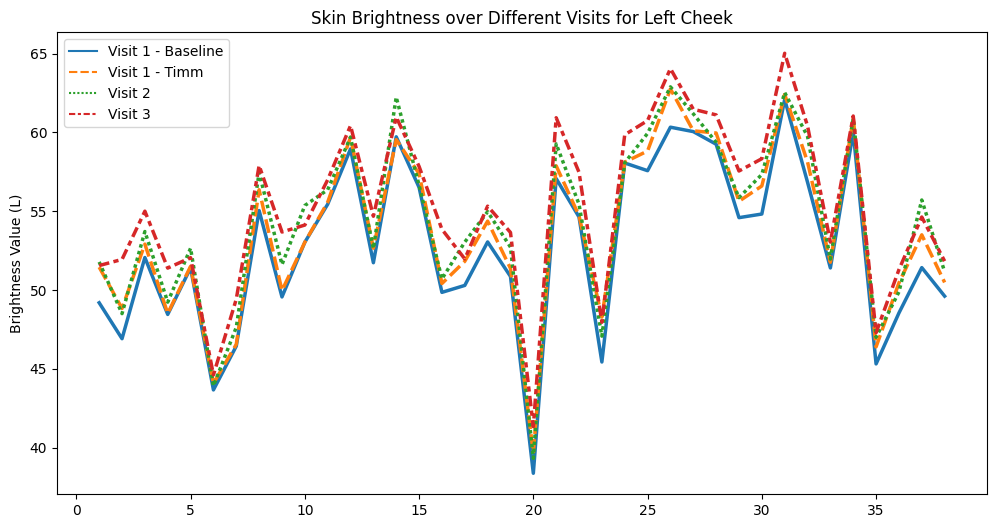

In [236]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=left_cheek, palette="tab10", linewidth=2.5)
plt.title('Skin Brightness over Different Visits for Left Cheek')
plt.ylabel('Brightness Value (L)')

## Draw the Line chart (for comparison of brightness value) over the different visits for right_cheek

Text(0, 0.5, 'Brightness Value (L)')

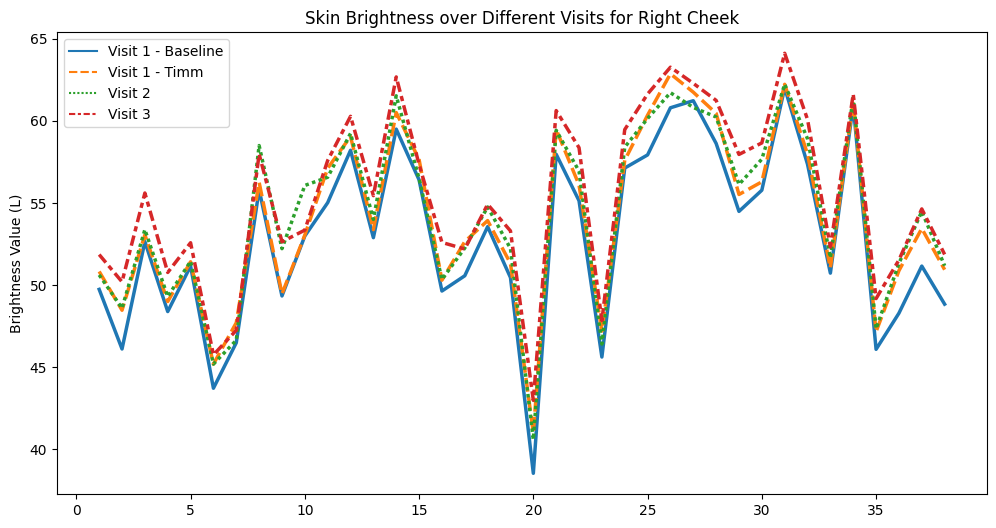

In [237]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=right_cheek, palette="tab10", linewidth=2.5)
plt.title('Skin Brightness over Different Visits for Right Cheek')
plt.ylabel('Brightness Value (L)')

## Draw the Line and bar chart for comparison of hydration values over the different visits

Text(0, 0.5, 'Hydration Value')

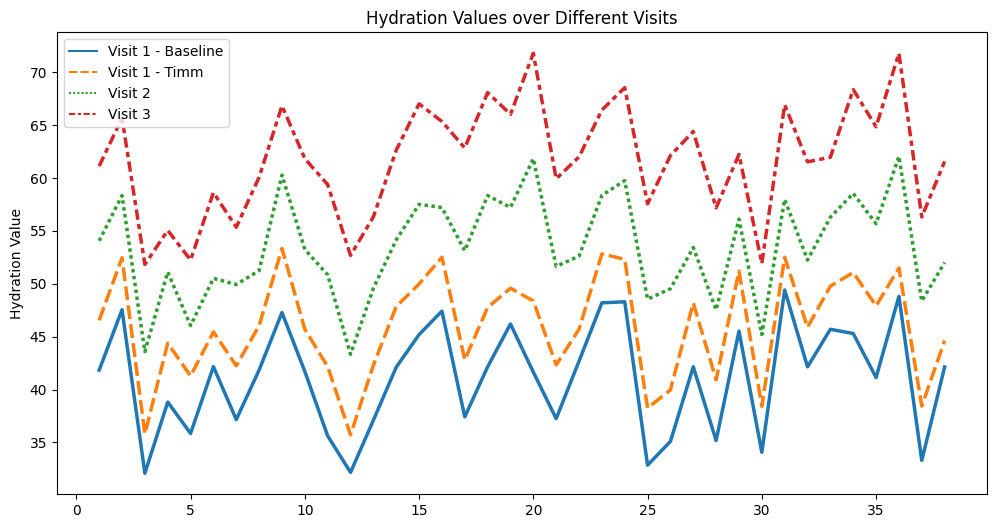

In [238]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hydration_values, palette="tab10", linewidth=2.5)
plt.title('Hydration Values over Different Visits')
plt.ylabel('Hydration Value')

Text(0, 0.5, 'Hydration Value')

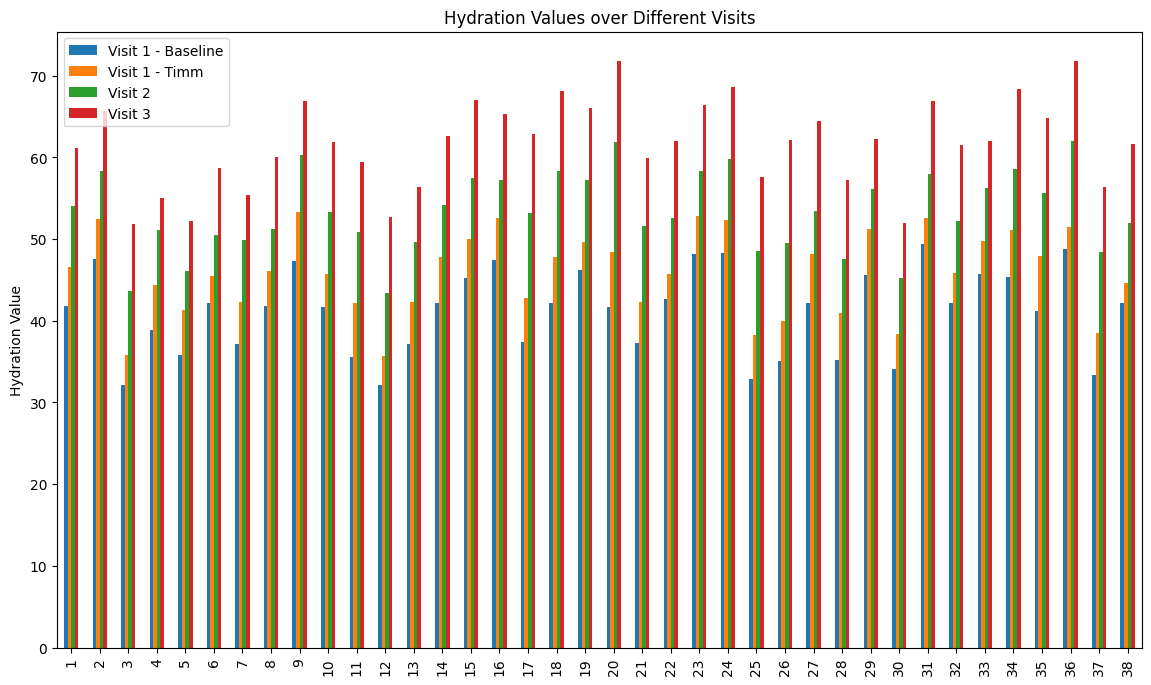

In [239]:
hydration_values.plot(kind='bar', figsize=(14,8))
plt.title('Hydration Values over Different Visits')
plt.ylabel('Hydration Value')

In [240]:
left_cheek.columns

Index(['Visit 1 - Baseline', 'Visit 1 - Timm', 'Visit 2', 'Visit 3'], dtype='object')

# Hypothesis Testing

## Perform statistical tests to compare the Skin Brightness values before Visit 1 Baseline and Visit 3:

**H_0 (Null Hypothesis)**: There is no difference in the skin brightness values (L) before Visit 1 Baseline and after Visit 3.

**H_a (Alternate Hypothesis)**: There is difference in the skin brightness values (L) before Visit 1 Baseline and after Visit 3.

In [241]:
from scipy.stats import ttest_ind
# Perform two-sample t-test
t_stat, p_value = ttest_ind(left_cheek.loc[:, 'Visit 1 - Baseline'], left_cheek.loc[:, 'Visit 3']) 
#only considering one cheek because the brightness value is same for both cheeks
# Print results
print('T-test for brightness values between visit 1-Baseline and Visit 3')
print('t =', t_stat)
print('p =', p_value)
if p_value >= 0.05:
    print("We fail to reject the null hypothesis. So, there is no difference in brightness value before and after applying the product.")
else:
    print("We reject the null hypothesis and conclude that there is difference in brightness value before and after applying the product.")



T-test for brightness values between visit 1-Baseline and Visit 3
t = -2.041561238448244
p = 0.044760405752850944
We reject the null hypothesis and conclude that there is difference in brightness value before and after applying the product.


## Perform statistical tests to compare the hydration values before Visit 1 Baseline and after Visit 3:

**H_0 (Null Hypothesis)**: There is no difference in the hydration values before Visit 1 Baseline and after Visit 3.

**H_a (Alternate Hypothesis)**: There is difference in the hydration values before Visit 1 Baseline and after Visit 3.

In [242]:
# Perform t-test to compare hydration values between visits 1 Baseline and Visit 3

from scipy.stats import ttest_ind
# Perform two-sample t-test
t_stat, p_value = ttest_ind(hydration_values.loc[:, 'Visit 1 - Baseline'], hydration_values.loc[:, 'Visit 3'])

# Print results
print('T-test for hydration values between Visit 1-Baseline and Visit 3')
print('t =', t_stat)
print('p =', p_value)
if p_value >= 0.05:
    print("We fail to reject the null hypothesis. So, there is no difference in hydration value before and after applying the product.")
else:
    print("We reject the null hypothesis and conclude that there is difference in hydration value before and after applying the product.")


T-test for hydration values between Visit 1-Baseline and Visit 3
t = -17.006605486748608
p = 2.8116717046343645e-27
We reject the null hypothesis and conclude that there is difference in hydration value before and after applying the product.


## Perform statistical tests to compare the left and right cheeks:

**H_0 (Null Hypothesis)**: There is no difference in the brightness values of the left and right cheeks.

**H_a (Alternate Hypothesis)**: There is difference in the brightness values of the left and right cheeks.

In [243]:
from scipy.stats import ttest_rel


# Perform paired t-test to compare brightness between left and right cheeks
t, p = ttest_rel(left_cheek.iloc[:, 0], right_cheek.iloc[:, 0])
print('T-test for Brightness between Left and Right Cheeks:')
print('t =', t)
print('p =', p)
if p >= 0.05:
    print("We fail to reject the null hypothesis. So, there is no difference in brightness value of left and right cheek.")
else:
    print("We reject the null hypothesis and conclude that there is difference in brightness value of left and right cheek.")

T-test for Brightness between Left and Right Cheeks:
t = -1.0762346510284941
p = 0.2887900562159596
We fail to reject the null hypothesis. So, there is no difference in brightness value of left and right cheek.


## Perform statistical tests to find the relationship between brightness value and hydration value.

In [244]:
from scipy.stats import pearsonr

# Compute Pearson correlation coefficient between brightness and hydration
corr, p = pearsonr(left_cheek.iloc[:, 0], hydration_values.iloc[:, 0])
print('Pearson Correlation Coefficient between Brightness and Hydration Values:')
print('corr =', corr)
print('p =', p)

Pearson Correlation Coefficient between Brightness and Hydration Values:
corr = -0.15403015537280837
p = 0.35584367497525216


The Pearson correlation coefficient (r) between brightness and hydration is -0.154, and the p-value is 0.356.

A negative value of the correlation coefficient indicates that there is a negative linear relationship between the two variables. So, if hydration increases, brightness tends to decrease, and vice versa. However, the value of -0.154 indicates that this relationship is weak.

**1** corr denotes highly positive correlation.

**-1** corr denotes highly negative correlation

The p-value of 0.356 indicates the probability of observing such a correlation by chance, assuming that there is actually no correlation between the variables in the population. Since, the p-value is greater than 0.05 (assuming a significance level of 0.05), we cannot reject the null hypothesis that there is no correlation between brightness and hydration in the population. 

However, the sample size and number of visits may affect the power of this test, and it is possible that a larger sample size or different experimental design could yield different results.